In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../"))

In [2]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
from scipy.linalg import qr_insert, qr

In [3]:
import desc

from desc.basis import *
from desc.backend import *
from desc.compute import data_index
from desc.coils import SplineXYZCoil
from desc.equilibrium import *
from desc.examples import get
from desc.grid import *
from desc.geometry import *

from desc.objectives import *
from desc.objectives.getters import *
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import factorize_linear_constraints
from desc.optimize._constraint_wrappers import *

from desc.transform import Transform
from desc.plotting import *
from desc.optimize import Optimizer
from desc.perturbations import *
from desc.profiles import PowerSeriesProfile

from desc.utils import copy_coeffs, svd_inv_null

from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.input_reader import InputReader
from desc.continuation import solve_continuation_automatic

DESC version 0.12.1+1328.g9dc24c2a8.dirty,using JAX backend, jax version=0.4.31, jaxlib version=0.4.31, dtype=float64
Using device: CPU, with 9.74 GB available memory


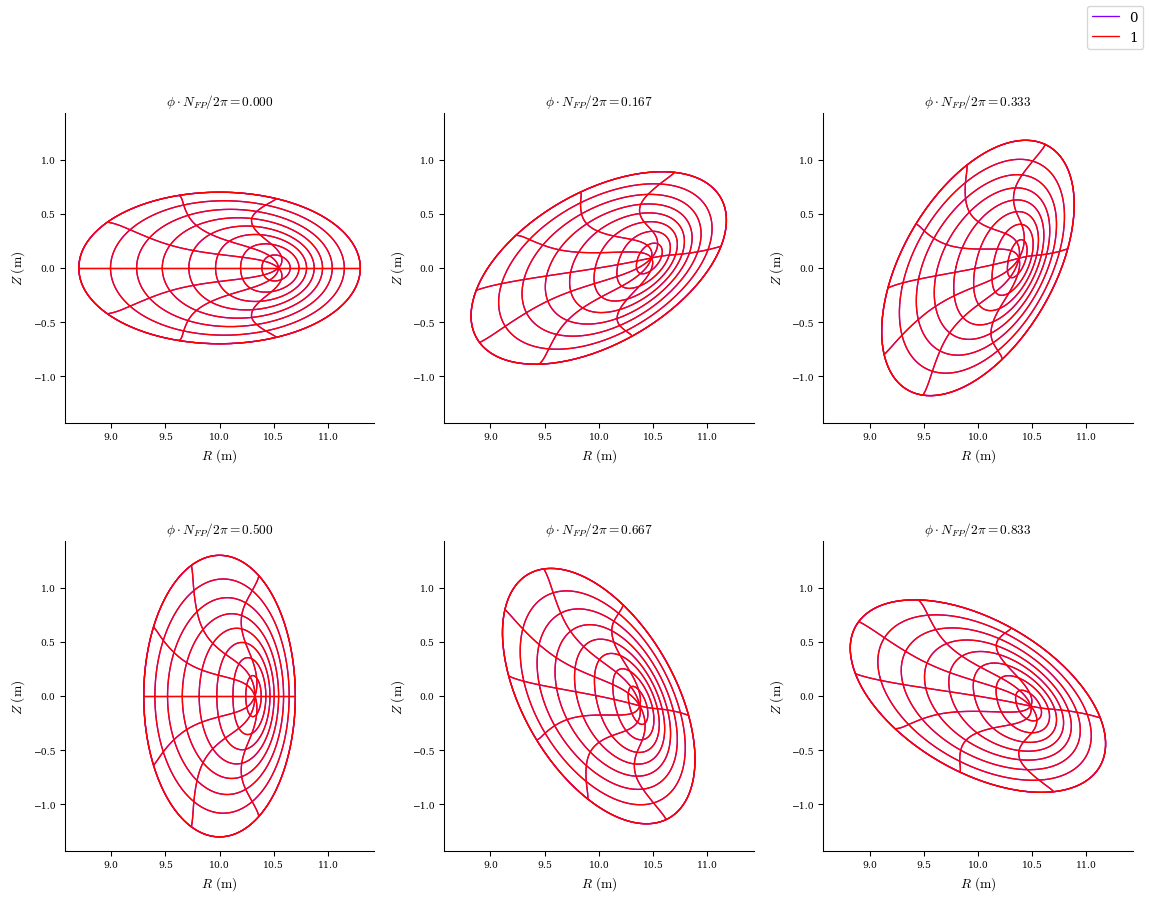

In [4]:
eq0 = get("HELIOTRON")
eq0_sfl = eq0.to_sfl(copy=True)
plot_comparison(eqs=[eq0, eq0_sfl]);

In [5]:
eq0_sfl.solve()
plot_comparison(eqs=[eq0, eq0_sfl]);

Building objective: force
Precomputing transforms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Number of parameters: 5567
Number of objectives: 4940

Starting optimization
Using method: lsq-exact


In [5]:
# eq = eq0.copy()
eq = eq0.set_poincare_equilibrium()
eq = eq.to_sfl()
# constraints = get_fixed_xsection_constraints(eq)
# constraints += (
#     FixBoundaryR(eq),
#     FixBoundaryZ(eq),
#     FixAxisR(eq),
#     FixAxisZ(eq),
# )
# modes_R = eq.R_basis.modes[eq.R_basis.modes[:, 2] == 0]
# modes_Z = eq.Z_basis.modes[eq.Z_basis.modes[:, 2] == 0]

# constraints += (
#     FixModeR(eq, modes=modes_R),
#     FixModeZ(eq, modes=modes_Z),
#     FixModeLambda(eq, modes=True),
# )
# objective = ObjectiveFunction(ForceBalance(eq))

In [ ]:
eq.solve(constraints=constraints, objective=objective, maxiter=100, verbose=3, ftol=0, gtol=0, xtol=0);

In [ ]:
plot_comparison(eqs=[eq, eq0]);

In [9]:
number_all = eq.R_lmn.shape[0] + eq.Z_lmn.shape[0] + eq.L_lmn.shape[0]
number_fixed = modes_R.shape[0] + modes_Z.shape[0] + eq.L_lmn.shape[0]
print(number_all)
print(number_fixed)
print(number_all - number_fixed)


4864
1976
2888
